# DBSCAN sur dataset clean

In [1]:
# IMPORT DES LIBRAIRIES (spécifique)

import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import itertools

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

In [2]:
df = pd.read_csv("./Coffee_dataset_cleaned_column_and_rows.csv")

In [3]:
df.head()

,Unnamed: 0.1,Unnamed: 0,ID,Species,Owner,Country.of.Origin,Farm.Name,Company,Region,In.Country.Partner,...,Body,Balance,Uniformity,Clean.Cup,Sweetness,Total.Cup.Points,Moisture,Color,Certification.Body,altitude_mean_meters
0,0,0,1,Arabica,metad plc,Ethiopia,metad plc,metad agricultural developmet plc,guji-hambela,METAD Agricultural Development plc,...,8.50,8.42,10.0,10.0,10.0,90.58,0.12,Green,METAD Agricultural Development plc,2075.0
1,1,1,2,Arabica,metad plc,Ethiopia,metad plc,metad agricultural developmet plc,guji-hambela,METAD Agricultural Development plc,...,8.42,8.42,10.0,10.0,10.0,89.92,0.12,Green,METAD Agricultural Development plc,2075.0
2,2,2,3,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,Specialty Coffee Association,...,8.33,8.42,10.0,10.0,10.0,89.75,0.00,NaN,Specialty Coffee Association,1700.0
3,3,3,4,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,yidnekachew debessa coffee plantation,oromia,METAD Agricultural Development plc,...,8.50,8.25,10.0,10.0,10.0,89.00,0.11,Green,METAD Agricultural Development plc,2000.0
4,4,4,5,Arabica,metad plc,Ethiopia,metad plc,metad agricultural developmet plc,guji-hambela,METAD Agricultural Development plc,...,8.42,8.33,10.0,10.0,10.0,88.83,0.12,Green,METAD Agricultural Development plc,2075.0


# Visualisation graphique de la donnée

In [ ]:
#'Aroma', 'Aftertaste', 'Acidity', 'Body', 'Sweetness'

In [4]:
X = ['Aroma', 'Aftertaste', 'Acidity', 'Body', 'Sweetness']

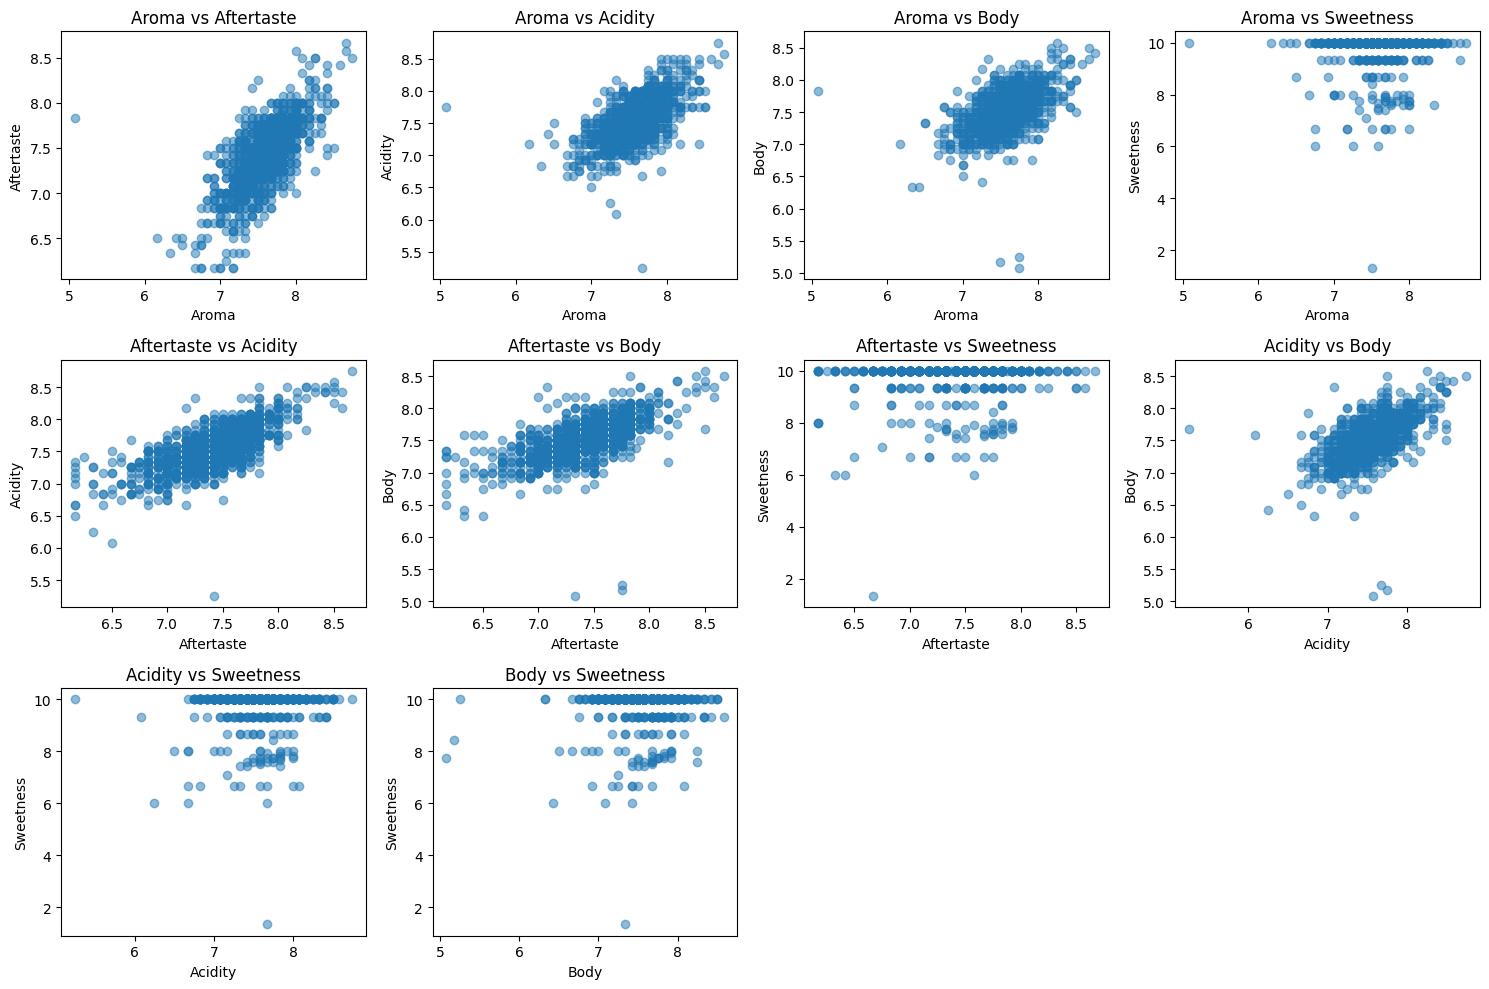

In [5]:
plt.figure(figsize=(15, 10))

for i, (col1, col2) in enumerate(itertools.combinations(X, 2), 1):
    plt.subplot(3, 4, i)  # Choix d'une disposition adaptée
    plt.scatter(df[col1], df[col2], alpha=0.5)
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title(f'{col1} vs {col2}')

plt.tight_layout()
plt.show()

# DBSCAN avec eps=0.2  &  min_samples=5

In [6]:
# Instanciate DBSCAN
db = DBSCAN(eps=0.2, min_samples=5, metric="euclidean", algorithm="brute")

In [7]:
# Normalisation de la donnée
numeric_cols =df[['Aroma', 'Aftertaste', 'Acidity', 'Body', 'Sweetness']] #Profile aromatique
scaler = StandardScaler()
features_scaled = scaler.fit_transform(numeric_cols)

In [8]:
# Fit on data
## No need to normalize data, it already is!
db.fit(features_scaled)

C:\Users\romai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\romai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.1520.0_x64__qbz5n2kfra8p0\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^

DBSCAN(algorithm='brute', eps=0.2)

In [9]:
fig = go.Figure()

In [10]:
# Loop through each label for our cluster
for i in np.unique(db.labels_):
    label = features_scaled[db.labels_ == i]
    fig.add_trace(go.Scatter(x=label[:, 0], y=label[:, 1], mode="markers", name="Cluster {}".format(i)))

fig.show()

In [14]:
df['clusters'] = db.labels_
df['clusters'].value_counts()


clusters
-1    1326
 0       6
 1       6
Name: count, dtype: int64

# DBSCAN avec eps=0.2  &  min_samples=2

In [15]:
# Instanciate DBSCAN
db = DBSCAN(eps=0.2, min_samples=2, metric="euclidean", algorithm="brute")

In [16]:
# Normalisation de la donnée
numeric_cols =df[['Aroma', 'Aftertaste', 'Acidity', 'Body', 'Sweetness']] #Profile aromatique
scaler = StandardScaler()
features_scaled = scaler.fit_transform(numeric_cols)

In [17]:
# Fit on data
## No need to normalize data, it already is!
db.fit(features_scaled)# Fit on data

DBSCAN(algorithm='brute', eps=0.2, min_samples=2)

In [18]:
fig = go.Figure()

In [19]:
# Loop through each label for our cluster
for i in np.unique(db.labels_):
    label = features_scaled[db.labels_ == i]
    fig.add_trace(go.Scatter(x=label[:, 0], y=label[:, 1], mode="markers", name="Cluster {}".format(i)))

fig.show()

In [20]:
df['clusters'] = db.labels_
df['clusters'].value_counts()

clusters
-1      1103
 45        6
 57        6
 18        4
 29        4
        ... 
 37        2
 36        2
 35        2
 33        2
 103       2
Name: count, Length: 105, dtype: int64

In [39]:
#df["clusters"] = db.labels_
#df["clusters"].value_counts()

In [40]:
df.head()

,Unnamed: 0.1,Unnamed: 0,ID,Species,Owner,Country.of.Origin,Farm.Name,Company,Region,In.Country.Partner,...,Uniformity,Clean.Cup,Sweetness,Total.Cup.Points,Moisture,Color,Certification.Body,altitude_mean_meters,preds,clusters
0,0,0,1,Arabica,metad plc,Ethiopia,metad plc,metad agricultural developmet plc,guji-hambela,METAD Agricultural Development plc,...,10.0,10.0,10.0,90.58,0.12,Green,METAD Agricultural Development plc,2075.0,-1,-1
1,1,1,2,Arabica,metad plc,Ethiopia,metad plc,metad agricultural developmet plc,guji-hambela,METAD Agricultural Development plc,...,10.0,10.0,10.0,89.92,0.12,Green,METAD Agricultural Development plc,2075.0,-1,-1
2,2,2,3,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,Specialty Coffee Association,...,10.0,10.0,10.0,89.75,0.00,NaN,Specialty Coffee Association,1700.0,-1,-1
3,3,3,4,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,yidnekachew debessa coffee plantation,oromia,METAD Agricultural Development plc,...,10.0,10.0,10.0,89.00,0.11,Green,METAD Agricultural Development plc,2000.0,-1,-1
4,4,4,5,Arabica,metad plc,Ethiopia,metad plc,metad agricultural developmet plc,guji-hambela,METAD Agricultural Development plc,...,10.0,10.0,10.0,88.83,0.12,Green,METAD Agricultural Development plc,2075.0,-1,-1


In [41]:
# Liste des colonnes à supprimer
columns_to_drop = ["preds", "clusters"]

In [42]:
# Suppression des colonnes
df = df.drop(columns=columns_to_drop)

In [43]:
df.head()

,Unnamed: 0.1,Unnamed: 0,ID,Species,Owner,Country.of.Origin,Farm.Name,Company,Region,In.Country.Partner,...,Body,Balance,Uniformity,Clean.Cup,Sweetness,Total.Cup.Points,Moisture,Color,Certification.Body,altitude_mean_meters
0,0,0,1,Arabica,metad plc,Ethiopia,metad plc,metad agricultural developmet plc,guji-hambela,METAD Agricultural Development plc,...,8.50,8.42,10.0,10.0,10.0,90.58,0.12,Green,METAD Agricultural Development plc,2075.0
1,1,1,2,Arabica,metad plc,Ethiopia,metad plc,metad agricultural developmet plc,guji-hambela,METAD Agricultural Development plc,...,8.42,8.42,10.0,10.0,10.0,89.92,0.12,Green,METAD Agricultural Development plc,2075.0
2,2,2,3,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,Specialty Coffee Association,...,8.33,8.42,10.0,10.0,10.0,89.75,0.00,NaN,Specialty Coffee Association,1700.0
3,3,3,4,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,yidnekachew debessa coffee plantation,oromia,METAD Agricultural Development plc,...,8.50,8.25,10.0,10.0,10.0,89.00,0.11,Green,METAD Agricultural Development plc,2000.0
4,4,4,5,Arabica,metad plc,Ethiopia,metad plc,metad agricultural developmet plc,guji-hambela,METAD Agricultural Development plc,...,8.42,8.33,10.0,10.0,10.0,88.83,0.12,Green,METAD Agricultural Development plc,2075.0


In [44]:
db.labels_

array([-1, -1, -1, ..., -1, -1, -1])

# DBSCAN avec eps=0.2  &  min_samples=25

In [21]:
# Instanciate DBSCAN
db = DBSCAN(eps=0.2, min_samples=25, metric="manhattan", algorithm="brute")

In [22]:
# Normalisation de la donnée
numeric_cols =df[['Aroma', 'Aftertaste', 'Acidity', 'Body', 'Sweetness']] #Profile aromatique
scaler = StandardScaler()
features_scaled = scaler.fit_transform(numeric_cols)

In [23]:
# Fit on data
## No need to normalize data, it already is!
db.fit(features_scaled)

DBSCAN(algorithm='brute', eps=0.2, metric='manhattan', min_samples=25)

In [24]:
fig3 = go.Figure()

In [25]:
# Loop through each label for our cluster
for i in np.unique(db.labels_):
    label = features_scaled[db.labels_ == i]
    fig3.add_trace(go.Scatter(x=label[:, 0], y=label[:, 1], mode="markers", name="Cluster {}".format(i)))

fig3.show()

In [27]:
df['clusters'] = db.labels_
df['clusters'].value_counts()

clusters
-1    1338
Name: count, dtype: int64

Tuning

In [51]:
def dbscan(data, eps=0.5, min_samples=5):
    db = DBSCAN(eps=eps, min_samples=min_samples, metric="euclidean", algorithm="brute")
    # Normalisation de la donnée
    numeric_cols =data[['Aroma', 'Aftertaste', 'Acidity', 'Body', 'Sweetness']] #Profile aromatique
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(numeric_cols)
    # Fit on data
    ## No need to normalize data, it already is!
    db.fit(features_scaled)

    df['clusters'] = db.labels_
    
    return df['clusters'].value_counts()

In [59]:
dbscan(df, eps=0.2, min_samples=10)

clusters
-1    1338
Name: count, dtype: int64